In [1]:
from queryFreeSurferMeasures import *
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Specify the filenames
fsDb = "/Users/schabdachj/Data/enigma_22q/tables/freesurfer_stats.db"
covFn = '/Users/schabdachj/Data/enigma_22q/use_final_cov_merged.csv'

In [3]:
## Load the freesurfer results as a dataframe

assert os.path.exists(fsDb)

# Connect to the database
cursor, connection = connectToDatabase(fsDb)

# Get a list of ids where one image id is returned per subject
idsStringForQuery, metadataDf = getSingleImageIdPerSubject(cursor)
metadataDf['session_id'] = metadataDf['session_id'].astype(np.int64)
metadataDf = metadataDf.set_index('session_id')

# Get the volumetric metrics for the image ids
measDf = getMeasureStatsAsDf(cursor, idsStringForQuery)

# Close the connection to the database
closeDatabase(connection)

# Convert the dataframes to numeric where relevant
for header in list(measDf):
    measDf[header] = measDf[header].astype(float)

measDf = measDf.infer_objects()

metDf = metadataDf.join(measDf, on='session_id')
print("Metrics DF")
print(metDf.shape)
print(list(metDf))

Metrics DF
(937, 24)
['subj', 'session', 'run', 'BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 'BrainSegVol-to-eTIV', 'Cortex', 'CorticalWhiteMatter', 'EstimatedTotalIntraCranialVol', 'Mask', 'MaskVol-to-eTIV', 'SubCortGray', 'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox', 'SurfaceHoles', 'TotalGray', 'lhCortex', 'lhCorticalWhiteMatter', 'lhSurfaceHoles', 'rhCortex', 'rhCorticalWhiteMatter', 'rhSurfaceHoles']


In [4]:
# Load the covariates dataframe
covDf = pd.read_csv(covFn)
covDf = covDf.infer_objects()
print("Covariates DF")
print(covDf.shape)
print(list(covDf))

Covariates DF
(889, 31)
['SubjID', 'Frank_MergeID', 'Alternate_ID', 'Chris_merge_ID', 'Site', 'Dx', 'DxName', 'Age', 'Sex', 'SexName', 'Psychotic_Disorder', 'Standard_Handedness', 'Within_Group_Scanner', 'Mega_Scanner', 'Mega_Scanner_Name', 'Deletion_Type', 'IQ', 'IQ_Method', 'Psychotic_Disorder.1', 'Psychotic_Disorder_Name', 'Psychosis_Dx_Method', 'Psychosis_Symptom_Severity', 'Prodromal_Symptoms', 'Standardized_Prodromal_Symptoms', 'Current_Typical_Antipsychotic', 'Current_Atypical_Antipsychotic', 'Current_Li', 'Current_AntiConvulsant', 'Current_AntiDep', 'Current_Psychostimulant', 'Current_Other_Med']


In [5]:
# Join the metrics dataframe to the covariates dataframe
covDf = covDf.drop(columns=['Frank_MergeID', 'Alternate_ID', 'Chris_merge_ID'])
subjs = list(covDf['SubjID'].values)

metDf = metDf[metDf['subj'].isin(subjs)]
metDf = metDf.rename(columns={'subj': 'SubjID'})
print(list(metDf))
print(list(covDf))

origDf = covDf.merge(metDf, on='SubjID')
print(origDf.shape)

['SubjID', 'session', 'run', 'BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 'BrainSegVol-to-eTIV', 'Cortex', 'CorticalWhiteMatter', 'EstimatedTotalIntraCranialVol', 'Mask', 'MaskVol-to-eTIV', 'SubCortGray', 'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox', 'SurfaceHoles', 'TotalGray', 'lhCortex', 'lhCorticalWhiteMatter', 'lhSurfaceHoles', 'rhCortex', 'rhCorticalWhiteMatter', 'rhSurfaceHoles']
['SubjID', 'Site', 'Dx', 'DxName', 'Age', 'Sex', 'SexName', 'Psychotic_Disorder', 'Standard_Handedness', 'Within_Group_Scanner', 'Mega_Scanner', 'Mega_Scanner_Name', 'Deletion_Type', 'IQ', 'IQ_Method', 'Psychotic_Disorder.1', 'Psychotic_Disorder_Name', 'Psychosis_Dx_Method', 'Psychosis_Symptom_Severity', 'Prodromal_Symptoms', 'Standardized_Prodromal_Symptoms', 'Current_Typical_Antipsychotic', 'Current_Atypical_Antipsychotic', 'Current_Li', 'Current_AntiConvulsant', 'Current_AntiDep', 'Current_Psychostimulant', 'Current_Other_Med']
(795, 51)


In [15]:
list(set(origDf['Sex'].values))
# origDf[origDf['Site'] == 'UCLA'].shape

[1, 2]

# Plot histograms of metrics

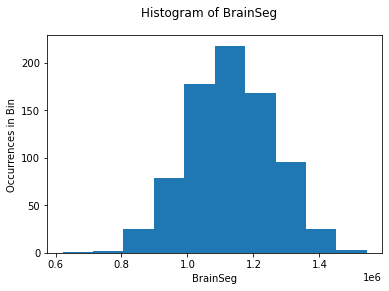

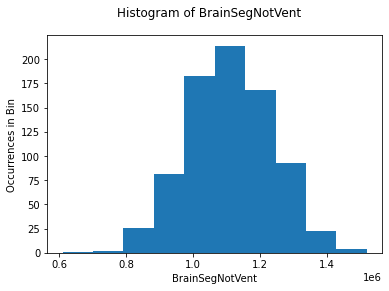

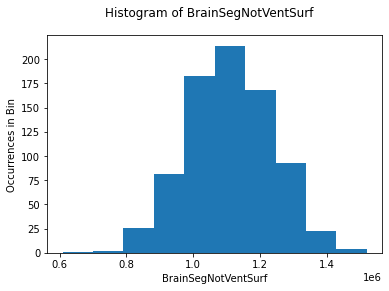

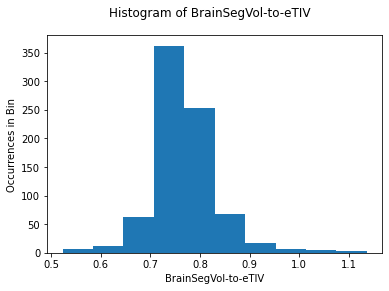

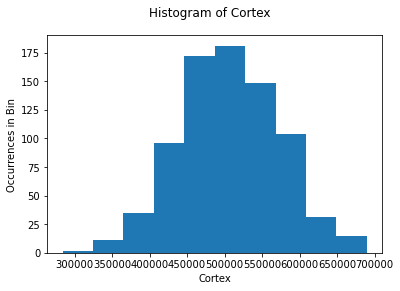

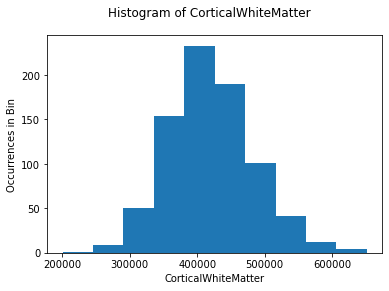

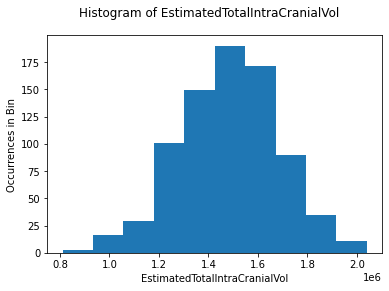

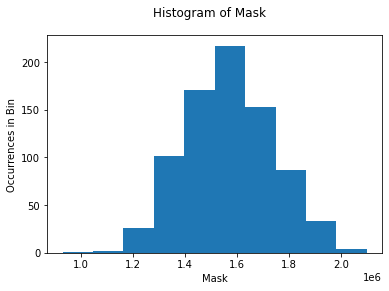

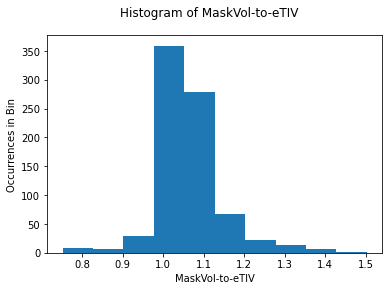

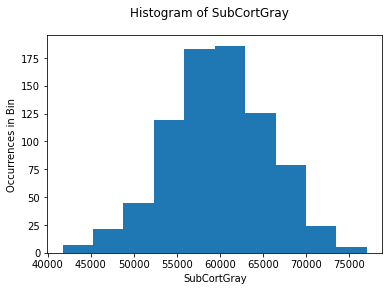

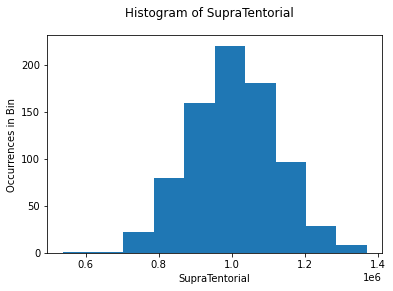

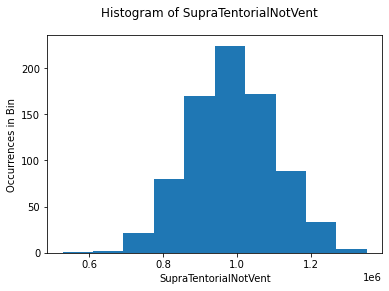

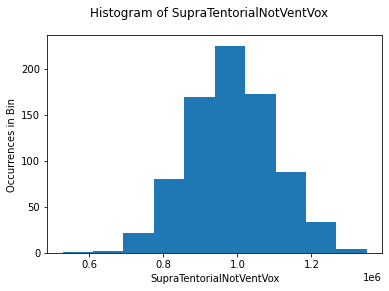

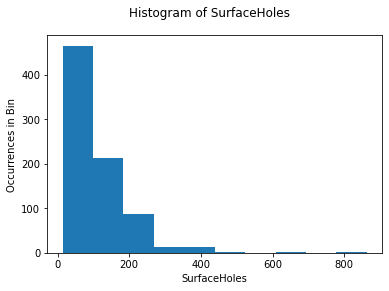

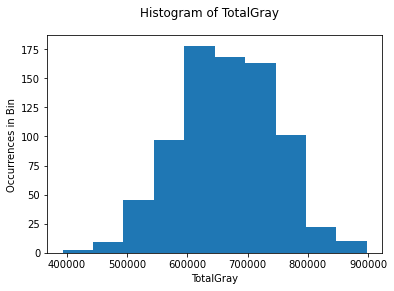

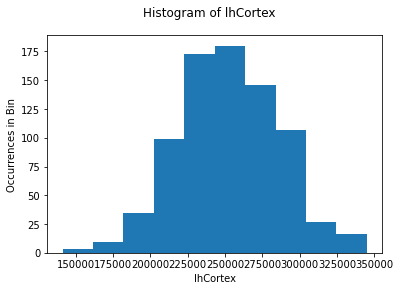

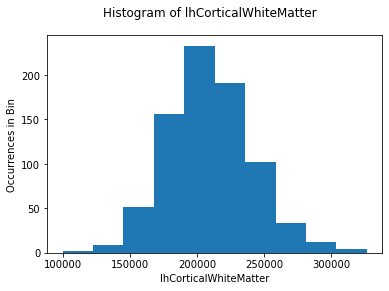

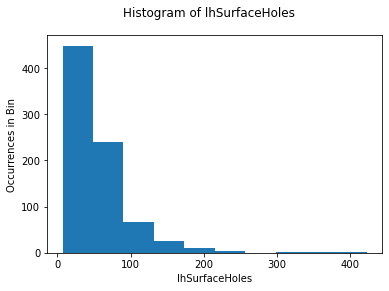

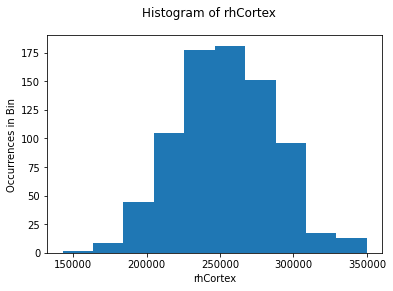

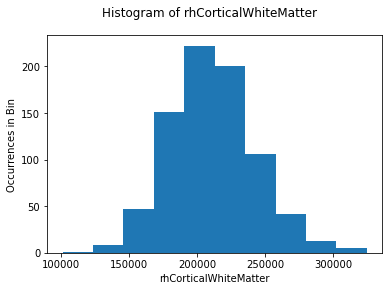

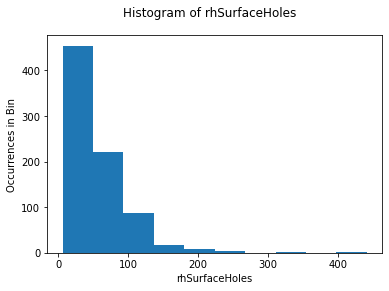

In [7]:
def plotMetricHist(metricList, label, subtitles=[]):

    if len(metricList) == 1:
        plt.figure()
        plt.hist(metricList[0])
        plt.xlabel(label)
        plt.ylabel('Occurrences in Bin')
        
    elif len(metricList) < 4:
        fig, axs = plt.subplots(1, len(metricList))
        for i in range(len(metricList)):
            axs[i].hist(metricList[i])
            axs[i].set_title(subtitles[i])
        
        plt.setp(axs, xlabel=label)
        plt.setp(axs[0], ylabel='Occurrences in Bin')
        
    plt.suptitle("Histogram of "+label)    
    plt.show()
        
for c in list(measDf):
    plotMetricHist([origDf[c].astype(float)], c, 
                   ["Original FreeSurfer"])

# Population Distributions

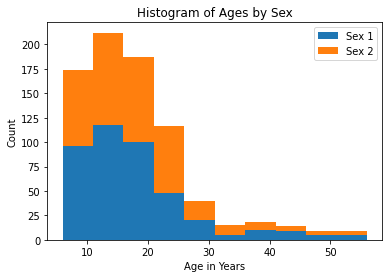

['22q11Dup', '22q11DS', 'HC']


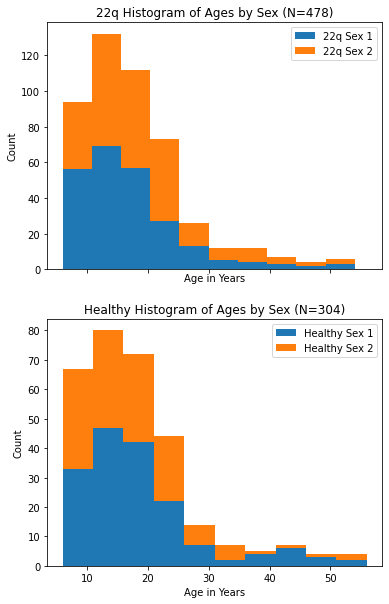

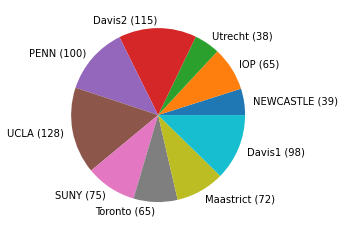

In [52]:
# Divide age by sex
agesSex1 = origDf[origDf['Sex'] == 1]['Age']
agesSex2 = origDf[origDf['Sex'] == 2]['Age']
labels = ['Sex 1', 'Sex 2']

# Plot age by sex
fig = plt.figure()
fig.patch.set_facecolor('w')
plt.hist([agesSex1, agesSex2], stacked=True, label=labels)
plt.title("Histogram of Ages by Sex")
plt.xlabel("Age in Years")
plt.ylabel("Count")
plt.legend()
plt.show()


# HC/22q
print(list(set(origDf['DxName'])))
df22q = origDf[origDf['DxName'] =='22q11DS']
dfHc = origDf[origDf['DxName'] == 'HC']

# Plot age by sex
fig, ax = plt.subplots(2, 1, figsize=(6, 10), sharex=True)
fig.patch.set_facecolor('w')

# Divide age by sex
agesSex1 = df22q[df22q['Sex'] == 1]['Age']
agesSex2 = df22q[df22q['Sex'] == 2]['Age']
labels = ['22q Sex 1', '22q Sex 2']

ax[0].hist([agesSex1, agesSex2], stacked=True, label=labels)
ax[0].title.set_text("22q Histogram of Ages by Sex (N="+str(df22q.shape[0])+")")
ax[0].set_xlabel("Age in Years")
ax[0].set_ylabel("Count")
ax[0].legend()

# Divide age by sex
agesSex1 = dfHc[dfHc['Sex'] == 1]['Age']
agesSex2 = dfHc[dfHc['Sex'] == 2]['Age']
labels = ['Healthy Sex 1', 'Healthy Sex 2']

ax[1].hist([agesSex1, agesSex2], stacked=True, label=labels)
ax[1].title.set_text("Healthy Histogram of Ages by Sex (N="+str(dfHc.shape[0])+")")
ax[1].set_xlabel("Age in Years")
ax[1].set_ylabel("Count")
ax[1].legend()

plt.show()

# Pie graph the sites
counts = []
labels = list(set(origDf['Site'].values))
for l in labels:
    counts.append(len(origDf[origDf['Site'] == l]))
labels = [labels[i]+" ("+str(counts[i])+")" for i in range(len(labels))]

fig = plt.figure()
fig.patch.set_facecolor('w')
plt.pie(counts, labels=labels)
plt.show()

# DOING RANDOM NONANALYSIS STUFF HERE

In [8]:
type(covDf['SubjID'].values[0])

str

In [9]:
qcDf = pd.read_csv('/Users/schabdachj/Data/enigma_22q/Subcort_Shape_QC.csv')
qcDf

,SubjID,Frank_MergeID,Alternate_ID,Chris_merge_ID,Lthal,Lcaud,Lput,Lpal,Lhippo,Lamyg,Laccumb,Rthal,Rcaud,Rput,Rpal,Rhippo,Ramyg,Raccumb
0,250816-50,250816-50,NaN,250816-50,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,261016-50,261016-50,NaN,261016-50,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,120215-1,120215-1,NaN,120215-1,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,010415-1,010415-1,NaN,010415-1,3,3,3,3,1,3,3,3,3,3,3,1,3,3
4,180216-2,180216-2,NaN,180216-2,3,3,3,3,1,3,3,3,3,3,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,C08,C08,C08,C08,3,3,3,3,3,3,3,3,3,3,3,3,3,3
885,C09,C09,C09,C09,3,3,3,3,3,3,3,3,3,3,3,3,3,3
886,C10,C10,C10,C10,3,3,3,3,3,3,3,3,3,3,3,3,3,3
887,C11,C11,C11,C11,3,3,3,3,3,3,3,3,3,3,3,3,3,3
